# Importing revelant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importing csv files

In [2]:
raw_train = pd.read_csv("train.csv")
raw_test = pd.read_csv("test.csv")

In [3]:
raw_train.describe(include="all")


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [4]:
raw_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
raw_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

from the above train data, there are a total of 891 passengers. Age is missing 177 values. Age is considered an important feature for survival as chances are a baby is more likely to survive than an elderly person.Cabin column  is missing 687 values, which is a high number thus need to drop it. Embarked is missing only 2 values.

# Data visualization

## Sex

In [6]:
d_sex = raw_train.groupby("Sex")["Survived"].sum()
d_sex

Sex
female    233
male      109
Name: Survived, dtype: int64

<AxesSubplot:ylabel='Survived'>

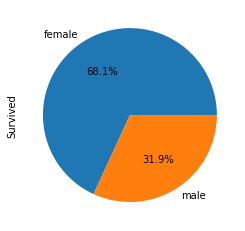

In [7]:
d_sex.plot.pie(autopct="%.1f%%")

This reveals that females have a higher chance of surviving than males (68.1% vs 31.9%)

## Pclass


In [8]:
d_pclass = raw_train.groupby("Pclass")["Survived"].sum()
d_pclass

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

<AxesSubplot:ylabel='Survived'>

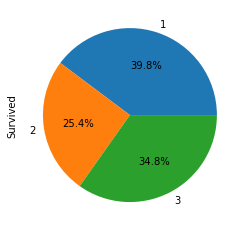

In [9]:
d_pclass.plot.pie(autopct="%.1f%%")

This reveals that people with a higher socioeconomic class had a higher chance of surviving (Pclass1 had 39.8%) but differs with Plcass2 and Plcass3. 

## Sibsp

In [10]:
d_sibsp = raw_train.groupby("SibSp")["Survived"].sum()
d_sibsp

SibSp
0    210
1    112
2     13
3      4
4      3
5      0
8      0
Name: Survived, dtype: int64

<AxesSubplot:ylabel='Survived'>

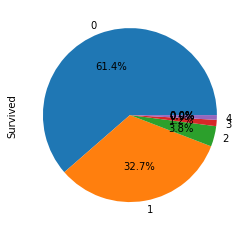

In [11]:
d_sibsp.plot.pie(autopct="%.1f%%")

 it's revealed that people with more siblings or spouses aboard were less likely to survive. 

## Parch


In [12]:
d_parch = raw_train.groupby("Parch")["Survived"].sum()
d_parch

Parch
0    233
1     65
2     40
3      3
4      0
5      1
6      0
Name: Survived, dtype: int64

<AxesSubplot:ylabel='Survived'>

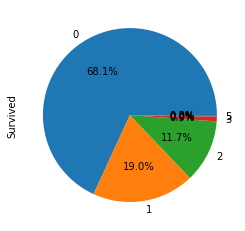

In [13]:
d_parch.plot.pie(autopct="%.1f%%")

It's revealed that people with more Parents and children aboard were less likely to survive.

## Embarked


In [14]:
d_embarked = raw_train.groupby("Embarked")["Survived"].sum()
d_embarked

Embarked
C     93
Q     30
S    217
Name: Survived, dtype: int64

Majority of the Survivors embarked from Southampton.

## Age

In [15]:
d_no_cabin = raw_train.drop(['Cabin'], axis = 1)
d_no_cabin.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN


In [16]:
d_cleaned_age = d_no_cabin.dropna(axis = 0)

In [17]:
d_cleaned_age.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,712.000000,712.000000,712.000000,712,712,712.000000,712.000000,712.000000,712,712.000000,712
unique,NaN,NaN,NaN,712,2,NaN,NaN,NaN,541,NaN,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,S
freq,NaN,NaN,NaN,1,453,NaN,NaN,NaN,7,NaN,554
mean,448.589888,0.404494,2.240169,NaN,NaN,29.642093,0.514045,0.432584,NaN,34.567251,NaN
std,258.683191,0.491139,0.836854,NaN,NaN,14.492933,0.930692,0.854181,NaN,52.938648,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN
25%,222.750000,0.000000,1.000000,NaN,NaN,20.000000,0.000000,0.000000,NaN,8.050000,NaN
50%,445.000000,0.000000,2.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,15.645850,NaN
75%,677.250000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,1.000000,NaN,33.000000,NaN


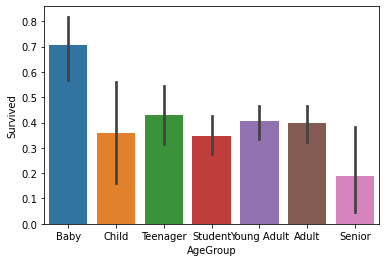

In [18]:
bins = [0, 5, 12, 18, 24, 35, 60, np.inf]
labels = [ 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
d_cleaned_age['AgeGroup'] = pd.cut(d_cleaned_age["Age"], bins, labels = labels)


#draw a bar plot of Age vs. survival
sns.barplot(x="AgeGroup", y="Survived", data=d_cleaned_age)
plt.show()

Babies had a higher chances of survival than Seniors. 

## Mapping 

In [19]:
#age
age_mapping = {'Baby': 0, 'Child': 1, 'Teenager': 2, 'Student': 3, 'Young Adult': 4, 'Adult': 5, 'Senior': 6}
d_cleaned_age['AgeGroup'] = d_cleaned_age['AgeGroup'].map(age_mapping)

#embarked
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
d_cleaned_age['Embarked'] = d_cleaned_age['Embarked'].map(embarked_mapping)

#sex
sex_mapping = {"male": 0, "female": 1}
d_cleaned_age['Sex'] = d_cleaned_age['Sex'].map(sex_mapping)
d_cleaned_age.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Name             object
Sex               int64
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Embarked          int64
AgeGroup       category
dtype: object

Mapping was done to assign numerical values to categorical values for purposes of manipulation. AgeGroup was converted to be an integer datatype instead of a category

In [20]:
d_cleaned_age['AgeGroup'].astype('int')

0      3
1      5
2      4
3      4
4      4
      ..
885    5
886    4
887    3
889    4
890    4
Name: AgeGroup, Length: 712, dtype: int32

In [21]:
d_cleaned_age["AgeGroup"] = d_cleaned_age['AgeGroup'].astype('int')
d_cleaned_age.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked         int64
AgeGroup         int32
dtype: object

## Data cleaning 

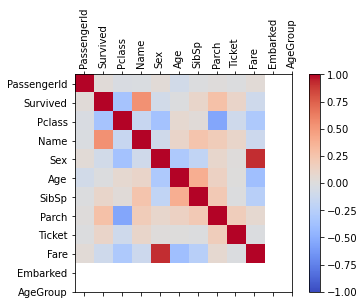

In [22]:
corr = d_cleaned_age.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(d_cleaned_age.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(d_cleaned_age.columns)
ax.set_yticklabels(d_cleaned_age.columns)
plt.show()

Variables were checked against "Survived" to check for correalation. 
PassengerId as expeceted had no correlation. 
Ticket and Fare had low correlation.
Age was substituted with AgeGroup.
Name seemed to have correlation

In [23]:
train_cleaned = d_cleaned_age.drop(['PassengerId','Ticket','Age','Fare','Name'], axis = 1)


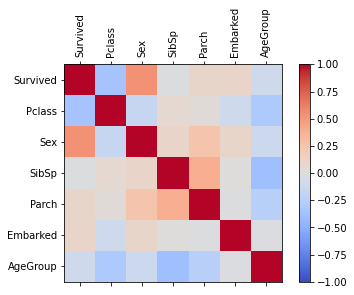

In [24]:
corr = train_cleaned.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(train_cleaned.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(train_cleaned.columns)
ax.set_yticklabels(train_cleaned.columns)
plt.show()

## Multicollinearity

In [25]:
train_cleaned.columns.values

array(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked',
       'AgeGroup'], dtype=object)

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = train_cleaned[['Pclass','Sex','SibSp','Parch','Embarked','AgeGroup']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [27]:
vif

,VIF,features
0,3.847118,Pclass
1,1.616536,Sex
2,1.569269,SibSp
3,1.558867,Parch
4,1.241680,Embarked
5,3.493252,AgeGroup


## Cleaning test

In [28]:
raw_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [29]:
bins = [0, 5, 12, 18, 24, 35, 60, np.inf]
labels = [ 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
raw_test['AgeGroup'] = pd.cut(raw_test["Age"], bins, labels = labels)
age_mapping = {'Baby': 0, 'Child': 1, 'Teenager': 2, 'Student': 3, 'Young Adult': 4, 'Adult': 5, 'Senior': 6}
raw_test['AgeGroup'] = raw_test['AgeGroup'].map(age_mapping)

sex_mapping = {"male": 0, "female": 1}
raw_test['Sex'] = raw_test['Sex'].map(sex_mapping)

embarked_mapping = {"S": 0, "C": 1, "Q": 2}
raw_test['Embarked'] = raw_test['Embarked'].map(embarked_mapping)

raw_test.describe(include = "all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
count,418.000000,418.000000,418,418.000000,332.000000,418.000000,418.000000,418,417.000000,91,418.000000,332.0
unique,NaN,NaN,418,NaN,NaN,NaN,NaN,363,NaN,76,NaN,7.0
top,NaN,NaN,"Kelly, Mr. James",NaN,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,NaN,4.0
freq,NaN,NaN,1,NaN,NaN,NaN,NaN,5,NaN,3,NaN,96.0
mean,1100.500000,2.265550,NaN,0.363636,30.272590,0.447368,0.392344,NaN,35.627188,NaN,0.464115,NaN
std,120.810458,0.841838,NaN,0.481622,14.181209,0.896760,0.981429,NaN,55.907576,NaN,0.685516,NaN
min,892.000000,1.000000,NaN,0.000000,0.170000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,NaN
25%,996.250000,1.000000,NaN,0.000000,21.000000,0.000000,0.000000,NaN,7.895800,NaN,0.000000,NaN
50%,1100.500000,3.000000,NaN,0.000000,27.000000,0.000000,0.000000,NaN,14.454200,NaN,0.000000,NaN
75%,1204.750000,3.000000,NaN,1.000000,39.000000,1.000000,0.000000,NaN,31.500000,NaN,1.000000,NaN


In [30]:
test_cleaned = raw_test.drop(['Ticket','Age','Fare','Name', 'Cabin'], axis = 1)

In [31]:
test_cleaned.describe(include = "all")

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,332.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,7.0
top,NaN,NaN,NaN,NaN,NaN,NaN,4.0
freq,NaN,NaN,NaN,NaN,NaN,NaN,96.0
mean,1100.500000,2.265550,0.363636,0.447368,0.392344,0.464115,NaN
std,120.810458,0.841838,0.481622,0.896760,0.981429,0.685516,NaN
min,892.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,996.250000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,1100.500000,3.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,1204.750000,3.000000,1.000000,1.000000,0.000000,1.000000,NaN


In [32]:
test = test_cleaned.dropna(axis = 0)

In [33]:
test.describe(include="all")

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup
count,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,7.0
top,NaN,NaN,NaN,NaN,NaN,NaN,4.0
freq,NaN,NaN,NaN,NaN,NaN,NaN,96.0
mean,1100.063253,2.144578,0.382530,0.481928,0.397590,0.379518,NaN
std,122.763173,0.846283,0.486739,0.874084,0.810651,0.607557,NaN
min,892.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,992.750000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,1099.500000,2.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,1210.250000,3.000000,1.000000,1.000000,1.000000,1.000000,NaN


## Testing models

In [34]:
from sklearn.model_selection import train_test_split

predictors = train_cleaned.drop(['Survived'], axis=1)
target = train_cleaned["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.20, random_state = 365)

In [35]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gaussian)

81.82


In [36]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

81.82


In [37]:
# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_svc)

81.82


In [38]:
# Perceptron
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_val)
acc_perceptron = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_perceptron)

75.52


In [39]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_decisiontree)

75.52


In [40]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

79.02


In [41]:
# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_knn)

79.02


In [42]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_val)
acc_sgd = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_sgd)

80.42


In [43]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gbk)

79.72


In [44]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron',  
              'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_randomforest, acc_gaussian, acc_perceptron, acc_decisiontree,
              acc_sgd, acc_gbk]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Support Vector Machines,81.82
2,Logistic Regression,81.82
4,Naive Bayes,81.82
7,Stochastic Gradient Descent,80.42
8,Gradient Boosting Classifier,79.72
1,KNN,79.02
3,Random Forest,79.02
5,Perceptron,75.52
6,Decision Tree,75.52


I chose to work with Logistic Regression for testing 

In [45]:
ids = test['PassengerId']
predictions = logreg.predict(test.drop('PassengerId', axis=1))

output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('results.csv', index=False)

